<a href="https://colab.research.google.com/github/navarromariana/WSJ_Sentiment_Analysis/blob/main/Wall_Street_J_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping

**Getting article urls from WSJ at a specific date**

In [ ]:
import requests
from bs4 import BeautifulSoup
headers = {"User-Agent": "Chrome"}
url = "https://www.wsj.com/news/archive/2023/01/01"
req = requests.get(url, headers=headers)
soup = BeautifulSoup(req.content, "html.parser")

#### Code to create a list containing the url of the 50 articles
l = []
for element in soup.find_all("article"):
    for link in element.find_all("a"):
        l.append(link["href"])
l = list(set(l))
print (l)

['https://www.wsj.com/articles/lincoln-douglas-and-netflix-streaming-social-media-tv-stories-plot-intelligence-attention-gold-fish-tiktok-11672427896', 'https://www.wsj.com/articles/california-storm-floods-roads-cuts-power-on-new-years-eve-11672602597', 'https://www.wsj.com/articles/soaring-costs-threaten-u-s-offshore-wind-buildout-11672474137', 'https://www.wsj.com/articles/australia-joins-countries-requiring-covid-tests-from-china-travelers-11672565916', 'https://www.wsj.com/articles/georgia-tcu-college-football-playoff-11672552456', 'https://www.wsj.com/articles/kaleidoscope-review-netflix-eric-garcia-giancarlo-esposito-episodes-random-heist-11672353852', 'https://www.wsj.com/articles/what-to-watch-the-17-best-new-movies-and-tv-shows-from-december-airdigital-11672431449', 'https://www.wsj.com/articles/southwest-airlines-vouchers-baggage-frequent-fliers-11672579328', 'https://www.wsj.com/articles/are-vaccines-fueling-new-covid-variants-xbb-northeast-antibodies-mutation-strain-immune-

**Getting article urls from different dates**

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

headers = {"User-Agent": "Chrome"}

def get_article_urls_for_day(base_url, date, articles_per_day=3):
    formatted_date = date.strftime("%Y/%m/%d")
    daily_url = f"{base_url}/{formatted_date}"

    req = requests.get(daily_url, headers=headers)
    if req.status_code == 200:
        soup = BeautifulSoup(req.content, "html.parser")
        # Get all article URLs for the day (up to the specified number)
        links = soup.find_all("article")[:articles_per_day]
        return [link.find("a").get("href") for link in links if link.find("a")]

    return []

# Get 3 articles a day for a year
if __name__ == "__main__":
    wsj_archive_url = "https://www.wsj.com/news/archive"
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 12, 31)
    articles_per_day = 3

    article_urls = []
    current_date = start_date

    while current_date <= end_date:
        article_urls.extend(get_article_urls_for_day(wsj_archive_url, current_date, articles_per_day))
        current_date += timedelta(days=1)

    print(article_urls)


**Extracting titles and dates from articles** (30 a day for 10 years : 2014-2023)

In summary, the code scrapes article titles and dates from the WSJ archive for a specified date range and stores the information in an Excel file. This can be useful for creating a local database of WSJ articles for analysis or other purposes.

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import pandas as pd  # Don't forget to import pandas



headers = {"User-Agent": "Chrome"}

def get_article_urls_for_day(base_url, date, articles_per_day=3):
    formatted_date = date.strftime("%Y/%m/%d")
    daily_url = f"{base_url}/{formatted_date}"

    req = requests.get(daily_url, headers=headers)
    if req.status_code == 200:
        soup = BeautifulSoup(req.content, "html.parser")
        # Get all article URLs for the day (up to the specified number)
        links = soup.find_all("article")[:articles_per_day]
        article_urls = [link.find("a").get("href") for link in links if link.find("a")]

        # Extract the date from the dynamic URL
        extracted_date = datetime.strptime(formatted_date, "%Y/%m/%d").strftime("%m/%d/%Y")

        return [(url, extracted_date) for url in article_urls]

    return []

def extract_info_from_url(article_url):
    req = requests.get(article_url, headers=headers)
    soup = BeautifulSoup(req.content, "html.parser")

    title_element = soup.find("h1", {"class": "css-1lvqw7f-StyledHeadline"})
    title = title_element.text.strip() if title_element else ""

    date_element = soup.find("p", {"class": "es486sg0 css-1jzm7tb-TimeTag"})
    date = date_element.text.strip() if date_element else ""

    return title, date

if __name__ == "__main__":
    wsj_archive_url = "https://www.wsj.com/news/archive"
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 12, 31)
    articles_per_day = 30

    article_urls = []
    current_date = start_date

    while current_date <= end_date:
        article_urls.extend(get_article_urls_for_day(wsj_archive_url, current_date, articles_per_day))
        current_date += timedelta(days=1)

    rows = []
    for url, date in article_urls:
        title, _ = extract_info_from_url(url)
        rows.append((title, date))

    df = pd.DataFrame(rows, columns=["Title", "Date"])
    df.to_excel("database.xlsx", index=False)


In [ ]:
from google.colab import files

df.to_excel("database.xlsx", index=False)
files.download("database.xlsx")

**Appending data bases**

In [ ]:
import pandas as pd

# Read the Excel files

database1 = pd.read_excel('database1.xlsx')

database2 = pd.read_excel('database2.xlsx')

database3 = pd.read_excel('database3.xlsx')

database4 = pd.read_excel('database4.xlsx')

database5 = pd.read_excel('database5.xlsx')

database6 = pd.read_excel('database6.xlsx')

database7 = pd.read_excel('database7.xlsx')

database8 = pd.read_excel('database8.xlsx')

database9 = pd.read_excel('database9.xlsx')

database10 = pd.read_excel('database10.xlsx')

# Append the data from databases
database00 = pd.concat([database10, database9, database8, database7, database6, database5, database4, database3, database2, database1], ignore_index=True)

# Save the combined dataset back to an Excel file if needed
database00.to_excel('combined_database.xlsx', index=False)



In [ ]:
from google.colab import files

database00.to_excel('combined_database.xlsx', index=False)
files.download("combined_database.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sentiment Analysis


The sentiment scale used by TextBlob ranges from -1 to 1, where:

* -1: Represents the most negative sentiment
* Between -1 and 0: Negative
* 0: Represents a neutral sentiment
* Between 0 and 1: Positive
* 1: Represents the most positive sentiment


**Sentiment analysis of the data base (average dayly sentiment)**

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the combined_database.xlsx file into a DataFrame
df = pd.read_excel("combined_database.xlsx")

# Fill missing values in the "Title" column with an empty string
df['Title'] = df['Title'].fillna("")

# Add a new column for sentiment scores
df['Sentiment'] = df['Title'].apply(lambda title: TextBlob(str(title)).sentiment.polarity)

# Convert the "Date" column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate the average sentiment score
average_sentiment_per_day = df.groupby('Date')['Sentiment'].mean().reset_index()

# Rename columns for clarity
average_sentiment_per_day.columns = ['Date', 'Average Sentiment']

# Display the results
print(average_sentiment_per_day)

average_sentiment_per_day.to_excel("average_sentiment_per_day.xlsx", index=False)


In [ ]:
from google.colab import files

average_sentiment_per_day.to_excel("average_sentiment_per_day.xlsx", index=False)
files.download("average_sentiment_per_day.xlsx")

**Yearly Sentiment by Conflict**

In summary, the code conducts sentiment analysis on titles from the dataset, separates the data based on two indicators, and calculates and presents the monthly and yearly average sentiment scores for each indicator. The results are saved in Excel files for further analysis or visualization.

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the combined_database1.xlsx file into a DataFrame
df = pd.read_excel("combined_database1.xlsx")

# Fill missing values in the "Title" column with an empty string
df['Title'] = df['Title'].fillna("")

# Initialize sentiment analysis using TextBlob
df['Sentiment'] = df['Title'].apply(lambda title: TextBlob(str(title)).sentiment.polarity)

# Convert the "Date" column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create DataFrames based on indicators
df_ip = df[df['ipPresent'] == True]
df_ur = df[df['urPresent'] == True]

# Group by month and calculate the average sentiment score for each indicator
average_sentiment_per_month_ip = df_ip.groupby(df_ip['Date'].dt.to_period("M"))['Sentiment'].mean().reset_index()
average_sentiment_per_month_ip.columns = ['Month', 'Average Sentiment (ipPresent)']

average_sentiment_per_month_ur = df_ur.groupby(df_ur['Date'].dt.to_period("M"))['Sentiment'].mean().reset_index()
average_sentiment_per_month_ur.columns = ['Month', 'Average Sentiment (urPresent)']

# Group by year and calculate the average sentiment score for each indicator
average_sentiment_per_year_ip = df_ip.groupby(df_ip['Date'].dt.year)['Sentiment'].mean().reset_index()
average_sentiment_per_year_ip.columns = ['Year', 'Average Sentiment (ipPresent)']

average_sentiment_per_year_ur = df_ur.groupby(df_ur['Date'].dt.year)['Sentiment'].mean().reset_index()
average_sentiment_per_year_ur.columns = ['Year', 'Average Sentiment (urPresent)']

# Display the results
print("Average Sentiment Per Month (ipPresent):")
print(average_sentiment_per_month_ip)

print("\nAverage Sentiment Per Month (urPresent):")
print(average_sentiment_per_month_ur)

print("\nAverage Sentiment Per Year (ipPresent):")
print(average_sentiment_per_year_ip)

print("\nAverage Sentiment Per Year (urPresent):")
print(average_sentiment_per_year_ur)

# Save the results to Excel files
average_sentiment_per_month_ip.to_excel("average_sentiment_per_month_ip.xlsx", index=False)
average_sentiment_per_month_ur.to_excel("average_sentiment_per_month_ur.xlsx", index=False)
average_sentiment_per_year_ip.to_excel("average_sentiment_per_year_ip.xlsx", index=False)
average_sentiment_per_year_ur.to_excel("average_sentiment_per_year_ur.xlsx", index=False)


**Line plots**

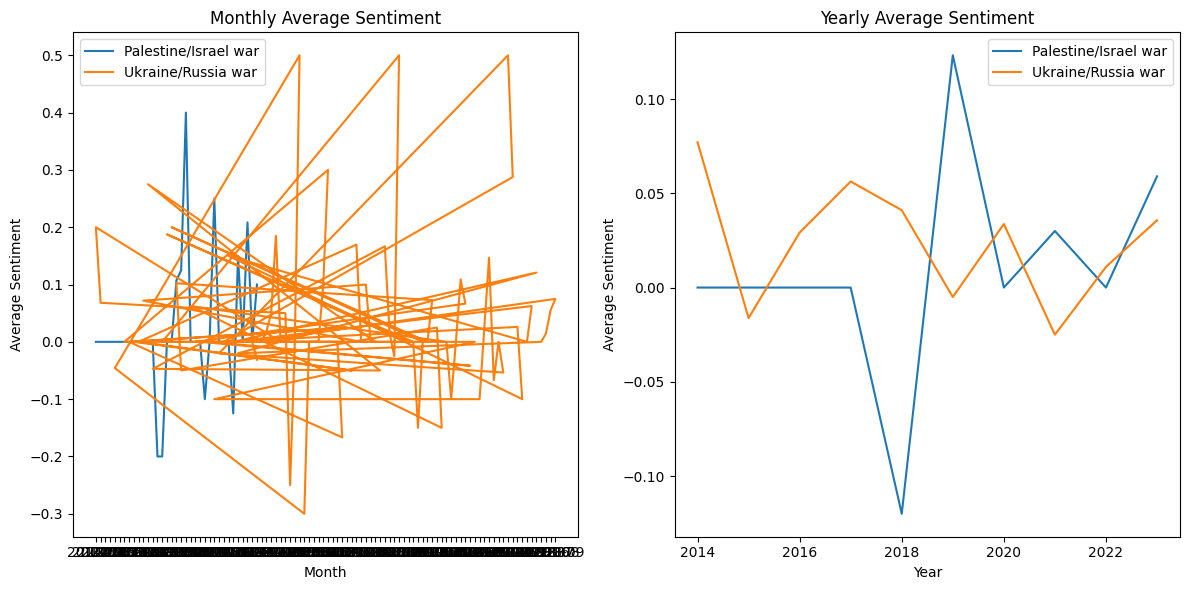

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the average sentiment data from the saved Excel files
average_sentiment_per_month_ip = pd.read_excel("average_sentiment_per_month_ip.xlsx")
average_sentiment_per_month_ur = pd.read_excel("average_sentiment_per_month_ur.xlsx")
average_sentiment_per_year_ip = pd.read_excel("average_sentiment_per_year_ip.xlsx")
average_sentiment_per_year_ur = pd.read_excel("average_sentiment_per_year_ur.xlsx")

# Plotting
plt.figure(figsize=(12, 6))

# Monthly Averages
plt.subplot(1, 2, 1)
plt.plot(average_sentiment_per_month_ip['Month'], average_sentiment_per_month_ip['Average Sentiment (ipPresent)'], label='Palestine/Israel war')
plt.plot(average_sentiment_per_month_ur['Month'], average_sentiment_per_month_ur['Average Sentiment (urPresent)'], label='Ukraine/Russia war')
plt.title('Monthly Average Sentiment')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.legend()

# Yearly Averages
plt.subplot(1, 2, 2)
plt.plot(average_sentiment_per_year_ip['Year'], average_sentiment_per_year_ip['Average Sentiment (ipPresent)'], label='Palestine/Israel war')
plt.plot(average_sentiment_per_year_ur['Year'], average_sentiment_per_year_ur['Average Sentiment (urPresent)'], label='Ukraine/Russia war')
plt.title('Yearly Average Sentiment')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.legend()

plt.tight_layout()
plt.show()


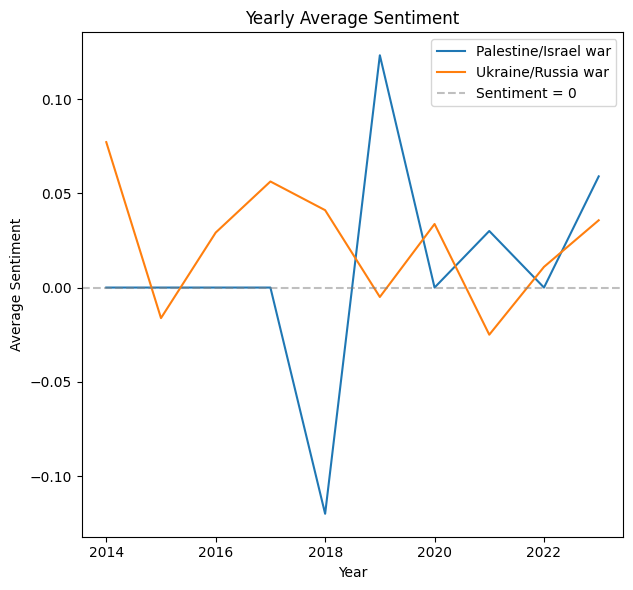

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the average sentiment data from the saved Excel files
average_sentiment_per_year_ip = pd.read_excel("average_sentiment_per_year_ip.xlsx")
average_sentiment_per_year_ur = pd.read_excel("average_sentiment_per_year_ur.xlsx")

# Plotting
plt.figure(figsize=(12, 6))

# Yearly Averages
plt.subplot(1, 2, 2)
plt.plot(average_sentiment_per_year_ip['Year'], average_sentiment_per_year_ip['Average Sentiment (ipPresent)'], label='Palestine/Israel war')
plt.plot(average_sentiment_per_year_ur['Year'], average_sentiment_per_year_ur['Average Sentiment (urPresent)'], label='Ukraine/Russia war')
plt.axhline(y=0, color='grey', linestyle='--', alpha=0.5, label='Sentiment = 0')  # Add a light grey dashed line at y=
plt.title('Yearly Average Sentiment')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.legend()

plt.tight_layout()
plt.show()